In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv( "/content/drive/MyDrive/HamoyeInternship/StageE/Time_series_analysis_and_forecast_DATASET.csv" ) 
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#check data shape
df.shape

(92016, 5)

In [4]:
#Check missing values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [41]:
#Convert date column to date object
df["FullDate"] = pd.to_datetime(df["FullDate"])
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [42]:
df.set_index("FullDate",inplace=True,drop=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [38]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [81]:
# resampling the dataset to a daily timeframe
df_daily = df.resample("D").sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


**Question 11**

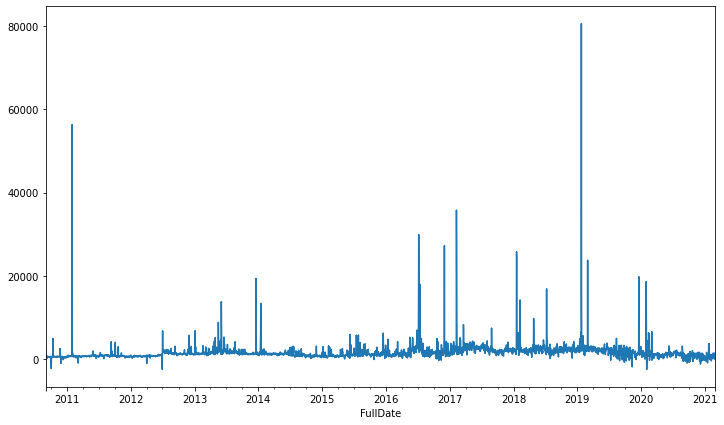

In [83]:
#Plotting Electric Price
plt.figure(figsize=(12,7))
df_daily["ElecPrice"].plot()

**Question 12**

In [91]:
#ADF test and generting p values
import statsmodels.tsa.stattools as sts
sys_p_value = sts.adfuller(df_daily["SysLoad"])[1]
gas_price_p_value = sts.adfuller(df_daily["GasPrice"])[1]
print("sys p value",np.round(sys_p_value,decimals=6))
print("Gas Price p value",np.round(gas_price_p_value,decimals=6)) 

sys p value 0.004254
Gas Price p value 0.045027


**Question 13**

In [96]:
# Generating critical values
x = sts.adfuller(df_daily["SysLoad"])[4]["10%"]
y = sts.adfuller(df_daily["ElecPrice"])[4]["5%"]
print("sys 10% critical",np.round(x,decimals=6))
print("Elecprice 5% critical",np.round(y,decimals=6)) 

sys 10% critical -2.567175
Elecprice 5% critical -2.862298


**Preprocessing data for training on facebook prophet**

In [9]:
df_daily.shape

(3834, 4)

In [56]:
#reset inde
df_daily.reset_index(drop=False,inplace=True)

In [57]:
#Rename columns
df_daily = df_daily.rename(columns= {"FullDate": "ds", "ElecPrice": "y"})

In [58]:
df_daily.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [59]:
#Divide data into training and testing
x = len(df_daily)
train = df_daily.loc[:2756]
test  = df_daily.loc[2757:]
print("Full data:",len(df_daily))
print("Train plus test:",len(train) + len(test))


Full data: 3834
Train plus test: 3834


In [18]:
#install prophet model
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 3.6 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638848 sha256=9b3f5b43518b9d4f3152751d9a850038f3003f187efbced4419c5a4977a74e11
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [97]:
#Import facebook prophet model
from fbprophet import Prophet


In [60]:
model = Prophet()
model.fit(train)
model.component_modes

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [61]:
y_true = test["y"]
preds = model.predict(test)
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,165.229978,4928.923383,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,249.433313,5119.244832,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,403.617076,5239.454393,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,156.560440,5177.191436,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-203.174501,4850.637548,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,401.632862,6392.239455,1871.502697,5232.067213,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,651.516180,6658.973707,1870.492716,5235.682405,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,223.792031,6078.958072,1869.472556,5239.297597,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,-38.759339,5850.367845,1866.766122,5242.818483,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


Question 14

In [98]:
#Calaculating mean absolute percentage error
def metric_mape(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y - yhat)/y)) *100
MAPE = metric_mape(test["y"], preds["yhat"])
round(MAPE,2)

549.48

**Question 15**

In [101]:
#Calculating root mean squrared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["y"],preds["yhat"])
rmse = np.sqrt(mse)
print(round(rmse,2))

3218.16


**Question 16**

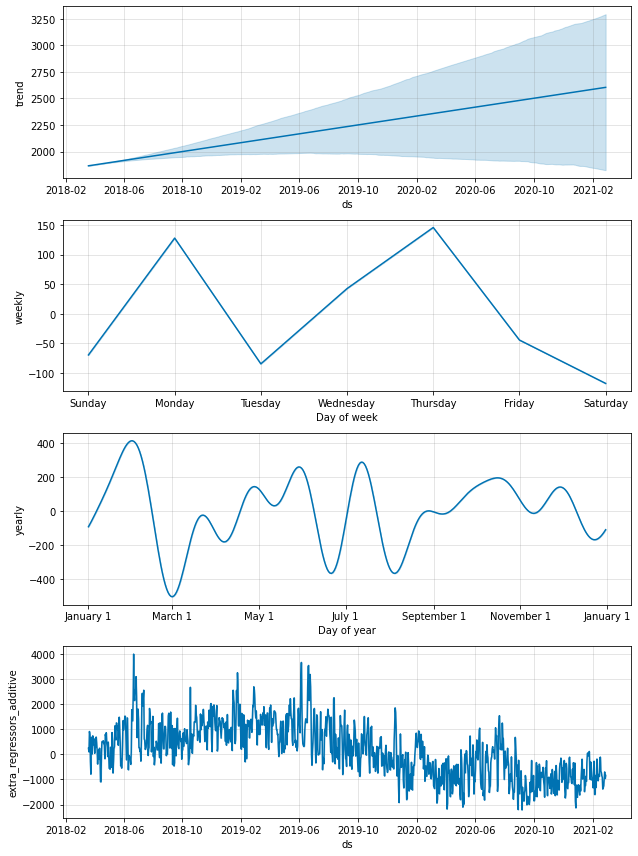

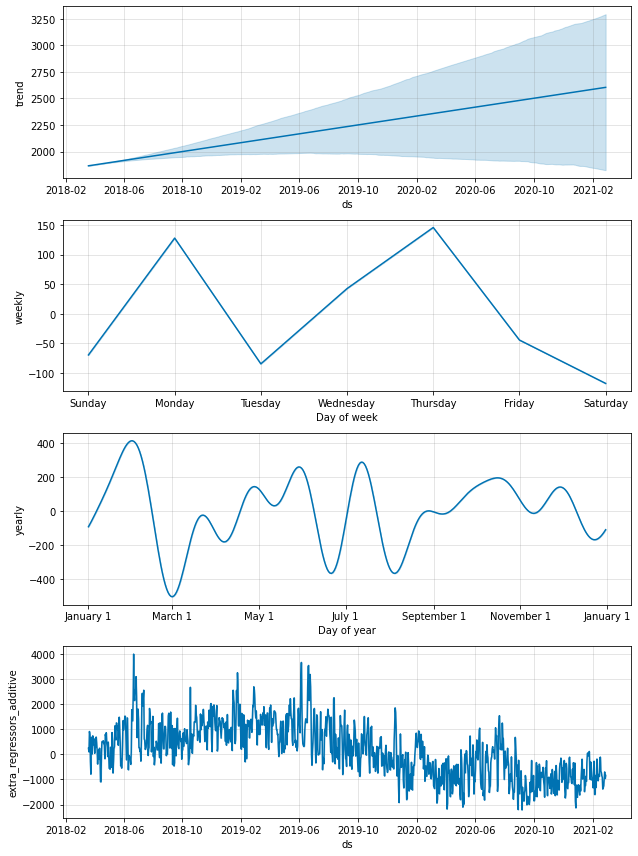

In [99]:
#plot prediction components
model.plot_components(pred2)

July has the highest yearly seasonality value

**Training prophet with multiple predictors**

In [74]:
#Renaming columns to be used as other predictors
df_daily = df_daily.rename(columns={"SysLoad":"add1","Tmax":"add2","GasPrice":"add3"})
df_daily.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [75]:
#Using multiple variables predictors
model = Prophet()
model.add_regressor("add1")
model.add_regressor("add2")
model.add_regressor("add3")

In [68]:
#Divide into trainning and test
new_train = df_daily.loc[:2756]
new_test  = df_daily.loc[2757:]
print("Full data:",len(df_daily))
print("Train plus test:",len(new_train) + len(new_test))

Full data: 3834
Train plus test: 3834


In [76]:
#Train model
model2 = model.fit(new_train)
#make predictions on test data
pred2= model2.predict(new_test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Question 17

In [100]:
#Calculating MAPE metrics
def metric_mape(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y - yhat)/y)) *100
MAPE = metric_mape(new_test["y"], pred2["yhat"])
round(MAPE,2)

231.28

**Question 18**

In [102]:
# Calculatimg rmse
mse = mean_squared_error(new_test["y"],pred2["yhat"])
rmse = np.sqrt(mse)
print(round(rmse,2))

2706.92


**Question 19**

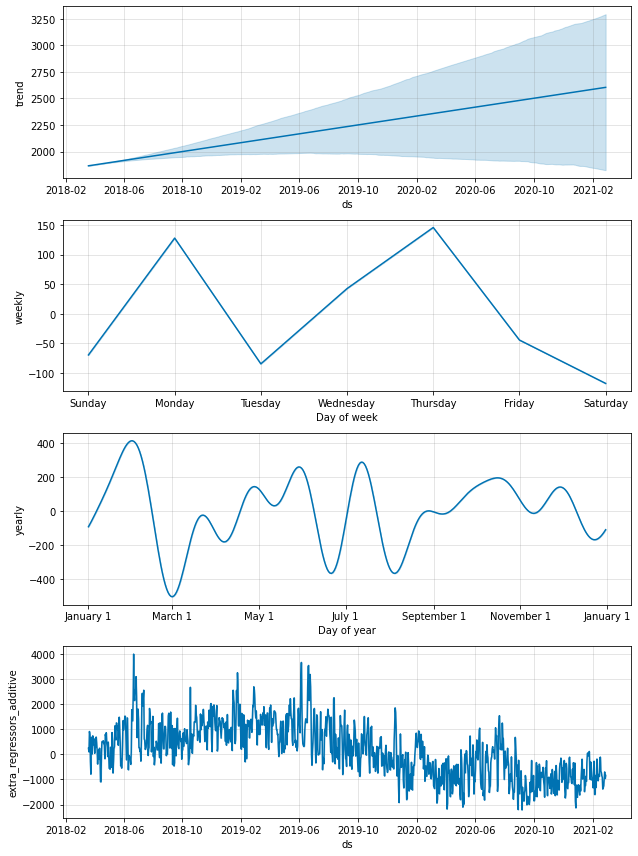

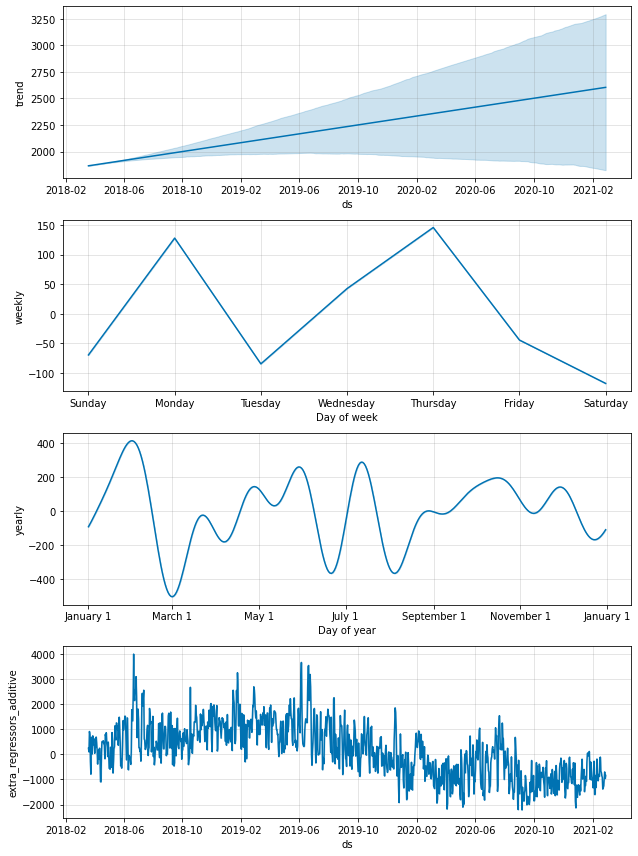

In [103]:
#Plotting prediction component
model2.plot_components(pred2)

Thursday has the highest daily seasonality

**Question 20**

In [106]:
#Training model and omiting add2(Tmax from predictors)
model = Prophet()
model.add_regressor("add1")
model.add_regressor("add3")
#Train model
model2 = model.fit(new_train)
#make predictions on test data
pred2= model2.predict(new_test)
#Calculating MAPE metrics
def metric_mape(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y - yhat)/y)) *100
MAPE = metric_mape(new_test["y"], pred2["yhat"])
print("MAPE wihout Tmax:",round(MAPE,2))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE wihout Tmax: 233.72
